### October 20, 2020

#### WarmUp/Review Exercises

Load the *Auto.csv* data (into a dataframe *cars*) for the following tasks and create a scatter plot `mpg ~ weight`.
Take a look at row with index $25$ (i.e. row 26); we will refer to that data point as $x_{25}$ from now on.

* Compute the standard score for 
    * $x_{25}$["mpg"]
    * $x_{25}$["weight"]
* Compute the product of these standard scores (call it $p_{25}$).
* If you repeated this process for all rows of the *cars* dataframe and averaged all products $p_{i}$, what would the resulting number tell you ? (What is it called?)
* Take a bootstrap sample from cars.mpg and compute the mean


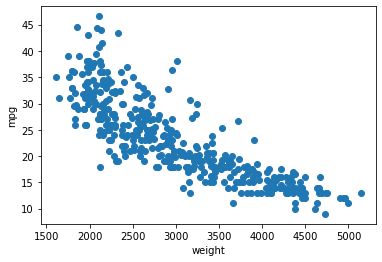

In [4]:
%run ./ourFunctions.py
%precision 3
cars = pd.read_csv('../data/Auto.csv')
plt.scatter("weight", "mpg",data=cars)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()

In [2]:
#np.argwhere(cars.weight > 4500)
cars.iloc[25,]

mpg                    10
cylinders               8
displacement          360
horsepower            215
weight               4615
acceleration           14
year                   70
origin                  1
name            ford f250
Manufacturer         ford
Name: 25, dtype: object

In [11]:
SSmpg = (cars.iloc[25,].mpg-np.mean(cars.mpg))/np.std(cars.mpg)
SSweight = (cars.iloc[25,].weight-np.mean(cars.weight))/np.std(cars.weight)

print(SSmpg,SSweight)

-1.7249312931191398 1.930190040010798


In [12]:
SSmpg*SSweight

-3.329

In [14]:
SSmpg = (cars.mpg-np.mean(cars.mpg))/np.std(cars.mpg)
SSweight = (cars.weight-np.mean(cars.weight))/np.std(cars.weight)
np.mean(SSmpg * SSweight)
#chap 7, p. 99
#correlation coefficient !!
#limited to [-1,1]

-0.832

In [15]:
np.sum(SSmpg * SSweight)

-326.240

In [16]:
np.corrcoef(cars.mpg, cars.weight)

array([[ 1.   , -0.832],
       [-0.832,  1.   ]])

In [19]:
#np.corrcoef(cars[["mpg", "horsepower", "weight"]])
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [20]:
np.random.seed(123)
bs_sample = np.random.choice(cars.mpg,len(cars.mpg))
np.mean(bs_sample)

23.385